In [ ]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Pulling my data from Yahoo
df = web.DataReader('GME', data_source='yahoo', start='2002-02-15', end='2021-02-26')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-02-15,10.025000,9.850000,10.000000,9.950000,2097400.0,6.699336
2002-02-19,9.900000,9.375000,9.900000,9.550000,1852600.0,6.430017
2002-02-20,9.875000,9.525000,9.600000,9.875000,1723200.0,6.648838
2002-02-21,9.925000,9.750000,9.840000,9.850000,1744200.0,6.632006
2002-02-22,9.925000,9.600000,9.925000,9.675000,881400.0,6.514178
...,...,...,...,...,...,...
2021-02-22,48.509998,42.400002,46.689999,46.000000,19476000.0,46.000000
2021-02-23,46.230000,40.000000,44.970001,44.970001,7565200.0,44.970001
2021-02-24,91.709999,44.700001,44.700001,91.709999,83111700.0,91.709999


In [ ]:
# Seeing how many rows and Columns we have in dataset
df.shape

(4791, 6)

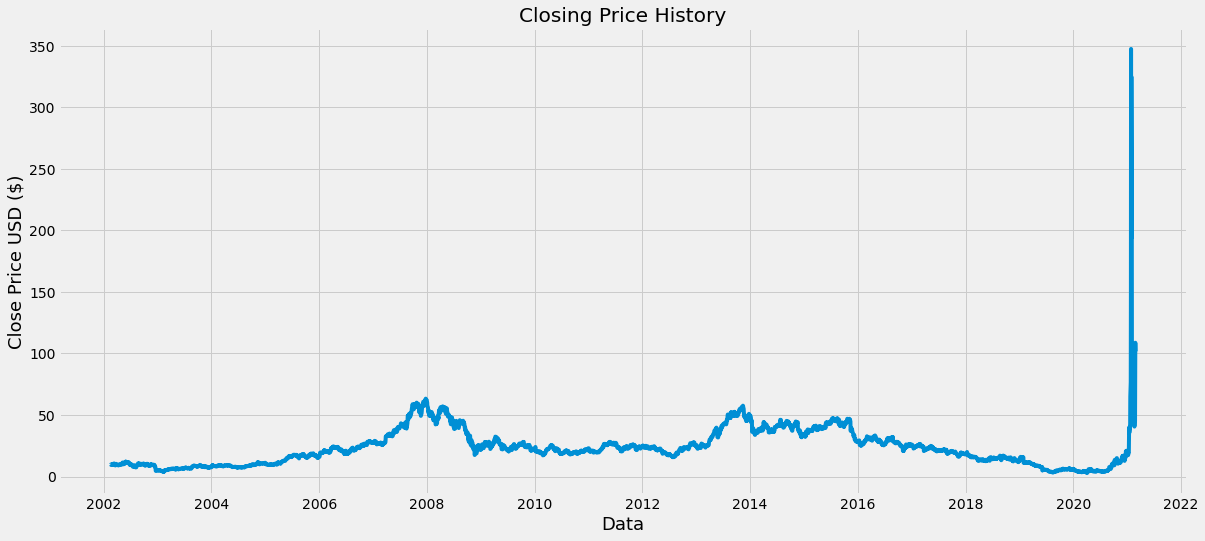

In [ ]:
# Displaying Closing Price
plt.figure(figsize=(18,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# THIS IS THE TRAIN DATASET WHICH IS ABOUT 80% OF THE FIRST DF
#Creat new dataframe 
data = df.filter(['Close'])
# Change into a numpy arrary
dataset = data.values
#Get the number of rows to train model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

3833

In [ ]:
#Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02074207],
       [0.01958168],
       [0.0205245 ],
       ...,
       [0.25792694],
       [0.30730179],
       [0.28702386]])

In [ ]:
# Pulling the Perdictions in numpy ararry
#Creat training data set
train_data = scaled_data[0:training_data_len , :]
#split into an x and y
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.02074207, 0.01958168, 0.0205245 , 0.02045197, 0.0199443 ,
       0.02016187, 0.02016187, 0.0196542 , 0.01958168, 0.01997331,
       0.02045197, 0.01979925, 0.0199443 , 0.02149633, 0.02219257,
       0.0225842 , 0.02262772, 0.02236663, 0.02233762, 0.0213948 ,
       0.01987177, 0.01900148, 0.01801514, 0.019074  , 0.01987177,
       0.02048098, 0.02085811, 0.02175742, 0.02117722, 0.01950915,
       0.01891445, 0.01885643, 0.0193641 , 0.01869687, 0.01842128,
       0.0193641 , 0.01932059, 0.01871138, 0.01834876, 0.01879841,
       0.01943663, 0.02061153, 0.02061153, 0.02127876, 0.02088712,
       0.0202344 , 0.02003133, 0.02001682, 0.01979925, 0.01929158,
       0.01950915, 0.02161237, 0.02209103, 0.02204752, 0.02342549,
       0.02306286, 0.02436831, 0.02502103, 0.02387514, 0.02306286])]
[0.022047516607742457]

[array([0.02074207, 0.01958168, 0.0205245 , 0.02045197, 0.0199443 ,
       0.02016187, 0.02016187, 0.0196542 , 0.01958168, 0.01997331,
       0.02045197, 0.01979925, 0.0

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3773, 60, 1)

In [ ]:
#Bulding the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Arrange the models
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

3773/3773 [==============================] - 98s 25ms/step - loss: 1.1115e-04


In [ ]:
#Create Testing data set
test_data = scaled_data[training_data_len - 60: , :]
# data set for x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
#Converting data into numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into from two to three dimensional
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
#Predicted Prices & Values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [24]:
#Finding the (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test )**2 )
rmse

0.45269351737235436

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



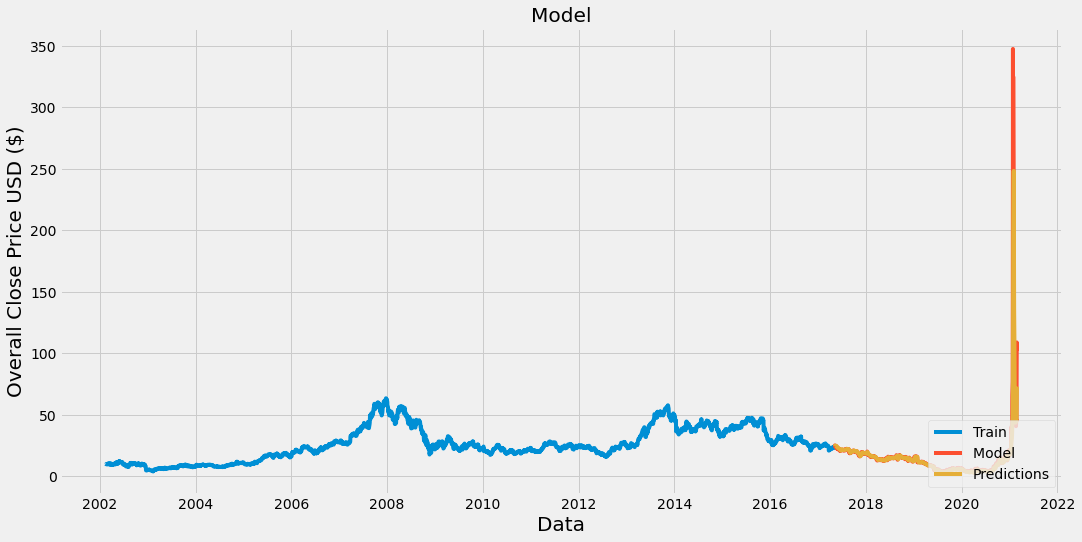

In [33]:
#Plot overall Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictoins'] = predictions
#Visual Examples for data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Model and Predictions', fontsize=20)
plt.ylabel('Overall Close Price USD ($)', fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictoins']])
plt.legend(['Train', 'Model ', 'Predictions'], loc='lower right')
plt.show()

In [39]:
#Display Valid and Predicted Prices
valid

In [ ]:
# Extract the code for Close Predictions
df.to_csv('Close_Predictoins', encoding='utf-8')

In [ ]:
#Get quote of GME Stock
gamestop_quote = web.DataReader('GME', data_source='yahoo', start='2002-02-15', end='2021-02-26')
#Create New dataframe
new_df = gamestop_quote.filter(['Close'])
#Get the last 60 days of closing price & convert df to array
last_60_days = new_df[-60:].values
#Scale the Data from and two values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Empty list
X_test = []
#append past 60 days
X_test.append(last_60_days_scaled)
#Convert X_test data set to numpy
X_test = np.array(X_test)
#Reshape Data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Scale the predicted
pred_price = model.predict(X_test)
# Release the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[86.4312]]


In [ ]:
#Another Quote
gamestop_quote2 = web.DataReader('GME', data_source='yahoo', start='2021-02-20', end='2021-02-27')
print(gamestop_quote2['Close'])

Date
2021-02-22     46.000000
2021-02-23     44.970001
2021-02-24     91.709999
2021-02-25    108.730003
2021-02-26    101.739998
Name: Close, dtype: float64
